In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

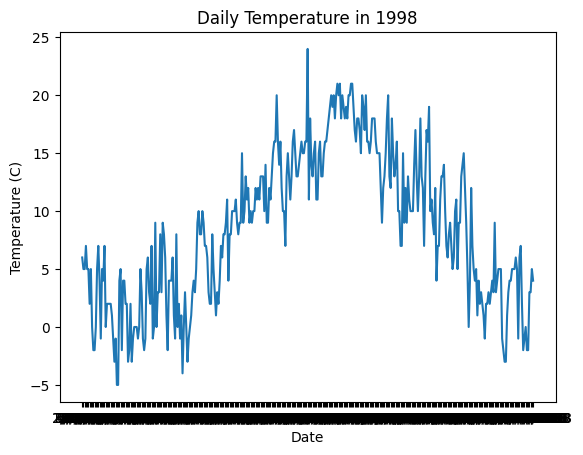

In [9]:
df = pd.read_csv("./data/1998.tsv", sep='\t')
plt.plot(df['date'], df['min'])
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Daily Temperature in 1998')
plt.show()

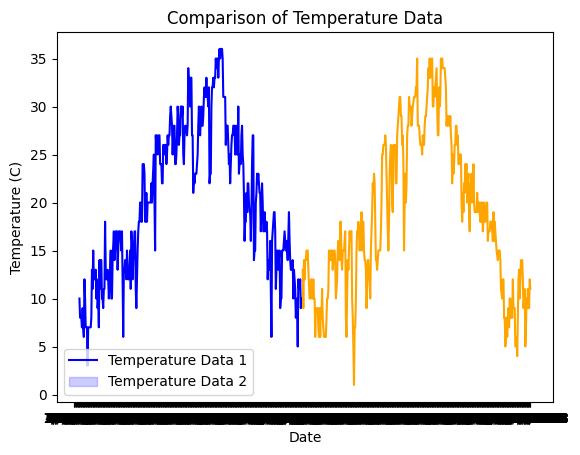

In [2]:
# import data
df1 = pd.read_csv('./data/2000.tsv', sep="\t")
df2 = pd.read_csv('./data/1998.tsv', sep="\t")

# create line plots
sns.lineplot(x='date', y='max', data=df1, color='blue')
sns.lineplot(x='date', y='max', data=df2, color='orange')

# add labels and title
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Comparison of Temperature Data')
plt.legend(['Temperature Data 1', 'Temperature Data 2'])
plt.show()

In [21]:
df1 = pd.read_csv('./data/1998.tsv', sep="\t")
df1.